# 6. flow_from_dataframe - dataframe 만들기

데이터프레임에 이미지를 넣는 것을 할 것이다. 
지난 시간에는 폴더별로 데이터가 들어 잇어서 케라스가 스스로 label을 찾아서 넣었는데
cifar 데이터 같은 경우는 폴더별이 아닌 파일별에 label이 있기 대문에 flow_from_directory 방법을 사용할 수 없다. 
그래서 데이터들을 엑셀이나 csv에 넣고, 그 옆에 경로와 label을 넣어서 학습시켜 보도록 하자. 

In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd #pandas의 dataframe을 이용해서 테이블로 만들어 excel로 저장하는 방법을 사용할 것이다. 
import matplotlib.pyplot as plt

%matplotlib inline

## 1. cifar 데이터 불러오기

## 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [8]:
    os.listdir('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train')

['32270_deer.png',
 '21851_cat.png',
 '48309_deer.png',
 '33547_truck.png',
 '45202_automobile.png',
 '2789_bird.png',
 '24517_horse.png',
 '15193_frog.png',
 '10817_ship.png',
 '49897_ship.png',
 '42274_dog.png',
 '7873_dog.png',
 '42550_horse.png',
 '45066_cat.png',
 '44738_dog.png',
 '44071_deer.png',
 '20642_deer.png',
 '34900_horse.png',
 '4062_frog.png',
 '18251_deer.png',
 '39228_dog.png',
 '16978_ship.png',
 '22394_automobile.png',
 '25124_ship.png',
 '6917_bird.png',
 '248_frog.png',
 '10711_automobile.png',
 '35881_ship.png',
 '37937_automobile.png',
 '4835_cat.png',
 '2804_airplane.png',
 '44927_ship.png',
 '33527_horse.png',
 '18797_ship.png',
 '38262_automobile.png',
 '31839_horse.png',
 '15717_bird.png',
 '1620_bird.png',
 '42179_airplane.png',
 '31068_truck.png',
 '25866_frog.png',
 '43479_airplane.png',
 '26869_truck.png',
 '7832_automobile.png',
 '38801_bird.png',
 '38918_horse.png',
 '7827_automobile.png',
 '37516_ship.png',
 '35804_cat.png',
 '24696_cat.png',
 '11518

In [10]:
train_paths = glob('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/*.png')
test_paths = glob('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/test/*.png')

In [12]:
len(train_paths), len(test_paths)

(50000, 10000)

In [13]:
path = train_paths[0]
path

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/32270_deer.png'

## 2. label( = class_name) 가져오기

In [15]:
#여기서 내 목표는 deer label을 가져오는 것!
#replace 사용법

path.replace('cifar', '+') #cifar을 +로 바꿔라

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/+/train/32270_deer.png'

In [18]:
#join 사용법
#['a', 'b, 'c']가 있으면, 
','.join(['a', 'b', 'c'])
          # ','기준으로 ['a', 'b, 'c']을 합쳐준다.는 의미이다.

'a,b,c'

In [19]:
#strip 사용법
#빈 공간이 있을 때 빈 공간을 없애주는 역할
'   abc.  '.strip()

'abc.'

In [20]:
#os.path.basename(path) 하면 파일명만 가지고 온다. 
os.path.basename(path)

'32270_deer.png'

In [21]:
#os.path.dirname(path) 하면 반대로 파일명 빼고 앞의 폴더명만 가지고 온다. 
os.path.dirname(path)

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train'

In [24]:
#os.path.exists(path) #해당 path가 있냐 없냐를 확인시켜주는 함수
os.path.exists(path)

True

In [26]:
# 이제 사용법을 배웟으니 지금부터 진짜 내가 원하는 여기서 내 목표는 deer label을 가져오는 것!을 하고자 한다. 
fname = os.path.basename(path)
fname

'32270_deer.png'

In [29]:
fname.replace('.png', '').split('_')

['32270', 'deer']

In [31]:
class_name = fname.replace('.png', '').split('_')[-1]
class_name

'deer'

In [32]:
#그럼 이 과정을 모든 파일에 반복해야 하므로 아에 함수로 만든다. 
def get_class_name(path) : 
    fname = os.path.basename(path)
    class_name = fname.replace('.png', '').split('_')[-1]
    return class_name

## 3. class수 확인

In [37]:
class_names = []

for path in train_paths : 
    class_name = get_class_name(path)
    class_names.append(class_name)

In [38]:
len(class_names)

50000

In [41]:
#label이 추출된 class_names 중 unique값들 10개만 보고 싶다면
np.unique(class_names)[:10]

#return_counts = True 쓰면 각 갯수도 보여준다. 
np.unique(class_names, return_counts = True)

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

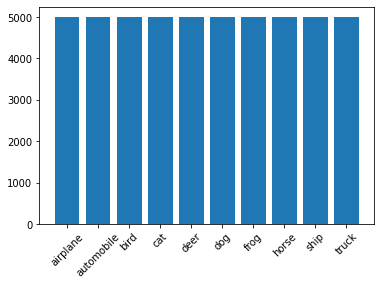

In [43]:
#시각화
uniques = np.unique(class_names, return_counts = True)
plt.bar(uniques[0], uniques[1])
plt.xticks(rotation = 45)#x축 이름 45도 돌려주는 것. 